![](Picture1.png)

- <b> What is Market Basket Analysis?<b>

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. 

<b>The use cases of market basket analysis <b>
    




- Build Netix-style recommendations engine.
- Improve product recommendations on an e-commerce store.
- Cross-sellproductsinaretailseing.
- Improve inventory management.
- Upsell products.

# Outline

<b> Objectives: <b>

- Prepare data for use in Market Basket Analysis.
- Identify patterns in consumer decision-making with mlxtend.
- Use metrics to evaluate the properties of patterns.
- Construct association rules that provide concrete recommendations for businesses.
- Perform pruning to identify useful rules.
- Visualize patterns and rules using seaborn and matplotlib.

<b> Libraries and necessary Skills: <b>

- numpy
- pandas
- matplotlib
- seaborn
- mlxtend
-----------------------------------------------------------------------------------------------------

  - Can define and manipulate an array in numpy.
  - Can define a DataFrame in pandas, create columns, and apply basic methods, such as .mean() and .sum().
  - Can use .apply() and lambda functions to transform columns in a DataFrame.
  - Can generate basic plots in matplotlib.

<b> What terms will be defined? <b>

- Transaction: A set of items purchased together.
- Itemset: A collection of unique items.
- Association rule: an "if-then" statement of association between two itemsets. For instance, "if coffee then milk" is an association rule that implies that customers who purchase coffee are also likely to purchase milk.
- Metric: The numerical measure of the intensity of an association between itemsets.
- Pruning: The removal of itemsets or rules that perform poorly according to a metric.

# Practice

<b>Data Preparation<b>



1. Discuss Brazilian e-commerce dataset.
2. Import data using pd.read_csv().
3. Define transaction and itemset.
4. Identify transactions in dataset using pandas and numpy methods.
5. Convert transactions to list of lists.

<b> The Dataset <b>

We'll use a dataset from a Brazilian ecommerce site (olist.com) that is divided into three CSV files:

1. olist_order_items_dataset.csv
2. olist_products_dataset.csv
3. product_category_name_translation.csv

<b> The column definitions are as follows: <b>

olist_order_items_dataset.csv:

- order_id: The unique identifier for a transaction.
- order_item_id: The order of an item within a transaction.
- product_id: The unique identifier for a product.
- price: The product's price.
------------------------------------------------------------------
olist_products_dataset.csv:

- product_id: The unique identifier for a product.
- product_category_name: The name of an item's product category in Portuguese.
- product_weight_g: The product's weight in grams.
- product_length_cm: The product's length in centimeters.
- product_width_cm: The product's width in centimeters.
- product_height_cm: The product's height in centimeters.
--------------------------------------------------------------------
product_category_name_translation.csv:

- product_category_name: The name of an item's product category in Portuguese.
- product_category_name_english: The name of an item's product category in English.

# Data Preparation

The "first step" in any Market Basket Analysis (MBA) project is to determine what constitutes an item, an itemset, and a transaction. This will depend on the dataset we're using and the question we're attempting to answer.

<b>Grocery store<b>
--------------------------------
- Item: Grocery
- Itemset: Collection of groceries
- Transaction: Basket of items purchased
----------------------------------------
<b>Music streaming service<b>
------------------------------------
- Item: Song
- Itemset: Collection of unique songs
- Transaction: User song library
------------------------------------------
<b>Ebook store<b>
-------------------------------------------
- Item: Ebook
- Itemset: One or more ebooks
- Transaction: User ebook library

<b>The data:<b>
--------------------------------------------------
We'll use a dataset of transactions from olist.com, a Brazilian ecommerce site.

- 100,000+ orders over 2016-2018.
- Olist connects sellers to marketplaces.
- Seller can register products with Olist.
- Customer makes purchase at marketplace from Olist store.
- Seller fulfills orders.

--------------------------------------------------------

![](lojas.png)

--------------------------------------------------------------------

<b> What is an item? <b>

- A product purchased from Olist.

<b>What is an itemset?<b>

- A collection of one or more product(s).

<b>What is a transaction?<b>

- An itemset that corresponds to a customer's order.

In [1]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend

# Set default asthetic parameters.
sns.set()


In [2]:
# Load orders dataset.
orders = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\olist_order_items_dataset.csv', delimiter = ",")

# Load products items dataset.
products = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\olist_products_dataset.csv', delimiter = ",")

# Load translations dataset.
translations = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\product_category_name_translation.csv', delimiter = ",")

In [3]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


In [4]:
# Print orders info.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [5]:
# Print products header.
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [6]:
# Print products info.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [7]:
# Print translations header.
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
# Print translations info.
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


------------------------------------------------

# Translating Product Names

<b> The product names are given in Portuguese.<b>

1. We'll translate the names to English using a pandas DataFrame named translations.
2. .merge() performs a join operation on columns or indices.
3. on is the column on which to perform the join.
4. how specifies which keys to use to perform the join.

In [9]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")

# Print English names.
products['product_category_name_english']

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

# Convert product IDs to product category names

<b>We can work with product IDs directly, but do not have product names.<b>

- Map product IDs to product category names, which are available in products.
- Use another .merge() with orders and subset of products columns.

<b>Using category names will also simplify the analysis, since there are fewer categories than products.<b>

In [10]:
# Define product category name in orders DataFrame.
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [11]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [12]:
# Drop products without a defined category.
orders.dropna(inplace=True, subset=['product_category_name_english'])

In [13]:
# Print number of unique items.
len(orders['product_id'].unique())

32328

In [14]:
# Print number of unique categories.
len(orders['product_category_name_english'].unique())

71

<b> Insight: Performing "aggregation" up to the product category level reduces the number of potential itemsets from $2^{32328}$ to $2^{71}$.<b>

# Construct transactions from order and product data

<b>We will perform Market Basket Analysis on transactions.<b>

- A transaction consists of the unique items purchased by a customer.

<b>Need to extract transactions from orders DataFrame.<b>

- Group all items in an order.

In [15]:
# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

# Print example.
example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [16]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

# Print example.
example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

<b>Insight: Aggregation reduces the number of items and, therefore, itemsets.<b>

<b>Map orders to transactions.<b>

- .groupby() splits a DataFrame into groups according to some criterion.
- .unique() returns list of unique values.

In [17]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby("order_id").product_category_name_english.unique()

# Print transactions header.
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75            [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

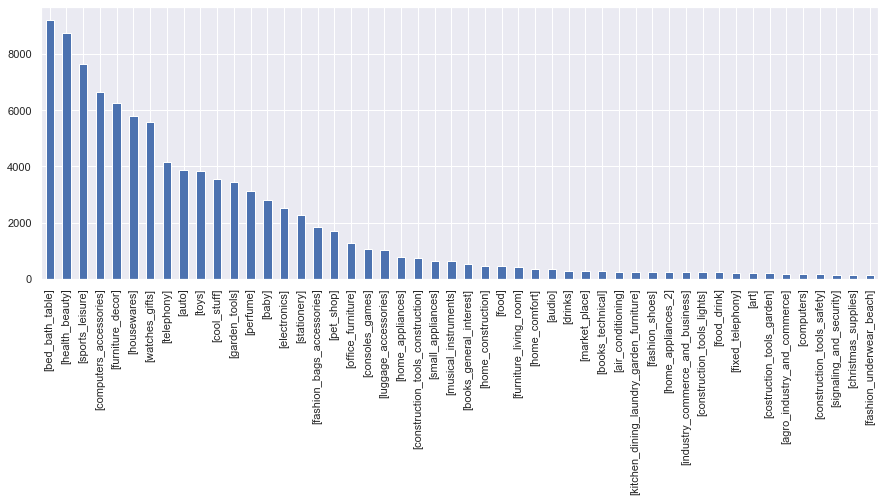

In [18]:
# Plot 50 largest categories of transactions.
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

<b>Insight 1: The most common itemsets consist of a single item.

Insight 2: There's a long tail of categories that consist of infrequently purchased items.<b>

<b>Use .tolist() to transform a DataFrame or Series object into a list.<b>

In [19]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()

# Summarize final transaction data

In [20]:
# Print length of transactions.
len(transactions)

97256

In [21]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]

In [22]:
# Print median number of items in a transaction.
np.median(counts)

1.0

In [23]:
# Print maximum number of items in a transaction.
np.max(counts)

3

------------------------------------------------------------------------------

# Association Rules and Metrics

<b> Association rule: an "if-then" relationship between two itemsets.<b>

- rule: if {coffee) then {milk}.
- antecedent: coffee
- consequent: milk

<b>Metric: a measure of the strength of association between two itemsets.<b>

- rule: if {coffee) then {milk}
- support: 0.10
- leverage: 0.03

# One-hot encode the transaction data

<b>One-hot encoding data.<b>

- TransactionEncoder() instantiates an encoder object.
- .fit() creates mapping between list and one-hot encoding.
- .transform() transforms list into one-hot encoded array.

<b>Applying one-hot encoding will transform the list of lists (of transactions) into a DataFrame.<b>

- The columns correspond to item categories and the rows correspond to transactions. A true indicates that a transaction contains an item from the corresponding category.

<b>One-hot encoding simplifies the computation of metrics.<b>

- We will also use a one-hot encoded DataFrame as an input to different mlxtend functions.

In [24]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [25]:
# Print header.
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<b>Compute the support metric<b>

- Support measures the frequency with which an itemset appears in a database of transactions.

![](support_math.svg)

- .mean(axis=0) computes support values for one-hot encoded DataFrame.
- A high support value indicates that items in an itemset are purchased together frequently and, thus, are associated with each other.

In [26]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_crafts               0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

<b>Observation:<b>

- In retail and ecommerce settings, any particular item is likely to account for a small share of transactions. Here, we've aggregated up to the product category level and very popular categories are still only present in 5% of transactions. Consequently, itemsets with 2 or more item categories will account for a vanishingly small share of total transactions (e.g. 0.01%).

<b>Compute the item count distribution over transactions<b>

- onehot.sum(axis=1) sums across the columns in a DataFrame.

In [27]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
dtype: int64

<b>Insight: Only 726 transactions contain more than one item category. We may want to consider whether aggregation discards too many multi-item itemsets.<b>

--------------------------------------

<b>Create a column for an itemset with multiple items<b>
--------------------------
<b> We can create multi-item columns using the logical AND operation.<b>

- True & True = True
- True & False = False
- False & True = False
- False & False = False

In [28]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

<b>Insight: Only 0.014% of transactions contain a product from both the sports and leisure, and health and beauty categories. These are typically the type of numbers we will work with when we set pruning thresholds in the following section.<b>

-----------------------------------

<b>Aggregate the dataset further by combining product sub-categories<b>
-------------------------------------
<b>We can use the inclusive OR operation to combine multiple categories.<b>


- True | True = True
- True | False = True
- False | True = True
- False | False = False

In [29]:
# Merge books_imported and books_technical.
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

# Print support values for books, books_imported, and books_technical.
onehot[['books','books_imported','books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

<b>Compute the confidence metric<b>
---------------------------------
<b>The support metric doesn't provide information about direction.<b>
![](antecentconsequent.svg)
    


<b>The confidence metric has a direction.<b>
--------------------------
<b>Conditional probability of the consequent, given the antecedent.<b>
![](confidence.svg)

- A high value of confidence indicates that the antecedent and consequent are associated and that the direction of the association runs from the antecedent to the consequent.

In [30]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [31]:
# Print confidence for health_beauty -> sports_leisure.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

<b>Insight: $confidence(sports\_leisure \rightarrow health\_beauty)$ was higher than $confidence(health\_beauty \rightarrow sports\_leisure)$.
- Since the two have the same joint support, the confidence measures will differ only by the antecedent support. The higher confidence metric means that the antecedent has lower support.<b>

----------------------------------------------------

# The Apriori Algorithm and Pruning

<b>The  Apriori algorithm identifies frequent (high support) itemsets using something called the Apriori principle, which states that a superset that contains an infrequent item is also infrequent.<b>

![](apriori.png)

<b>Pruning is the process of removing itemsets or association rules, typically based on the application of a metric threshold.<b>



<b>The mlxtend module will enable us to apply the Apriori algorithm, perform pruning, and compute association rules.<b>

<b>Applying the Apriori algorithm<b>
--------------------------

- Use apriori() to identify frequent itemsets.
- min_support set the item frequency threshold used for pruning.

In [32]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.040070,(5)
1,0.029664,(6)
2,0.096827,(7)
3,0.068777,(15)
4,0.010920,(16)
5,0.037345,(20)
6,0.026219,(27)
7,0.019166,(28)
8,0.066310,(40)
9,0.036173,(43)


<b>Observation 1: apriori returns a DataFrame with a support column and an itemsets column.<b>


<b>Observation 2: By default apriori returns itemset numbers, rather than labels. We can change this by using the use_colnames parameter.<b>

<b>Insight: All itemsets with a support of greater than 0.01 contain a single item.<b>

- Use use_colnames to use item names, rather than integer IDs.

In [34]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.003599,(audio)
4,0.040070,(auto)
5,0.029664,(baby)
6,0.096827,(bed_bath_table)
7,0.005264,(books_general_interest)
8,0.002673,(books_technical)
9,0.001316,(christmas_supplies)


<b>Insight: Lowering the support threshold increased the number of itemsets returned and even yielded itemsets with more than one item.<b>

In [35]:
# Apply apriori algorithm to data with min support threshold of 0.00005.
frequent_itemsets = apriori(onehot, min_support = 0.00005, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_crafts)
4,0.003599,(audio)
...,...,...
108,0.000051,"(stationery, luggage_accessories)"
109,0.000051,"(sports_leisure, watches_gifts)"
110,0.000144,"(sports_leisure, sports_leisure_health_beauty)"
111,0.000062,"(stationery, toys)"


<b>Observation: Notice how low we must set the support threshold (0.005%) to return a high number of itemsets with more than one item.<b>

In [36]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

<b>Insight: What do we gain from the apriori algorithm? We start off with $2^{71}$ potential itemsets and immediately reduce it to 113 without enumerating all $2^{71}$ itemsets.<b>

<b>Computing association rules from Apriori output<b>
-------------------------    
- Use association_rules() to compute and prune association rules from output of apriori().

In [37]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baby),(bed_bath_table),0.029664,0.096827,0.000175,0.005893,0.060856,-0.002697,0.908527
1,(bed_bath_table),(baby),0.096827,0.029664,0.000175,0.001805,0.060856,-0.002697,0.972091
2,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185633,-0.000902,0.969375
3,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185633,-0.000902,0.975709
4,(baby),(furniture_decor),0.029664,0.066310,0.000123,0.004159,0.062728,-0.001844,0.937590


<b>Notice that association_rules automatically computes seven metrics.<b>

# Pruning association rules

In [38]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,-0.000086,0.957388
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,-0.000146,0.958606
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881
4,(books_imported),(books),0.000545,0.003218,0.000545,1.000000,310.722045,0.000543,inf
5,(books),(books_imported),0.003218,0.000545,0.000545,0.169329,310.722045,0.000543,1.203190
6,(books_technical),(books),0.002673,0.003218,0.002673,1.000000,310.722045,0.002665,inf
7,(books),(books_technical),0.003218,0.002673,0.002673,0.830671,310.722045,0.002665,5.889872
8,(construction_tools_lights),(furniture_decor),0.002509,0.066310,0.000113,0.045082,0.679872,-0.000053,0.977770
9,(furniture_living_room),(furniture_decor),0.004339,0.066310,0.000072,0.016588,0.250155,-0.000216,0.949439


In [39]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


<b>The leverage metric<b>
-----------------------------    
Leverage provides a sanity check.
- $support(antecedent, consequent)$ = joint support in data.
- $support(antecedent) * support(consequent)$ = expected joint support for unrelated antecedent and consequent.


<b>Leverage formula<b>
-------------------------
$$leverage(antecendent, consequent) = 
support(antecedent, consequent) - support(antecedent) * support(consequent)$$
- For most problems, we will discard itemsets with negative leverage.
- Negative leverage means that the items appear together less frequently than we would expect if they were randomly and independently distributed across transactions.

In [40]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


<b>Insight: The Apriori algorithm reduced the number of itemsets from $2^{71}$ to 113.

- Pruning allowed us to identify to a single association rule that could be useful for cross-promotional purposes: $\{home\_comfort\} \rightarrow \{bed\_bath\_table\}$.<b>

-----------------------------------------------

<b>Visualizing patterns in metrics<b>
------------    
- sns.scatterplot() creates a scatterplot from two columns in a DataFrame.

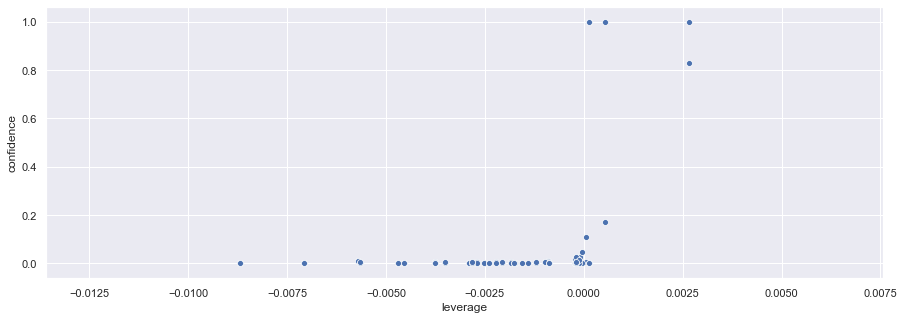

In [42]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

<b>Insight 1: Leverage and confidence contain some of the same information about the strength of an association.<b>